# Basic model

In [159]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from shapely import wkt
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.impute import SimpleImputer
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler


In [160]:
# Step 1: Load the CSV into a Pandas DataFrame
df = pd.read_csv("data/augmented_data.csv")

# Step 2: Convert the geometry column from WKT to actual geometry
# Assuming your geometry column is named 'geometry'
df['geometry'] = df['geometry'].apply(wkt.loads)

# Step 3: Create a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry='geometry')

# Step 4: Set the coordinate reference system (CRS) if known
gdf.set_crs("EPSG:2056", inplace=True)  # Replace with your CRS if different

# Now gdf is a GeoDataFrame with Polygon geometries

,id,geometry,SoilType,WaterRetention,NutrientContent,WaterPermeability,index_right,elevation,date,east_lv95,north_lv95
0,717,"POLYGON ((2488071.58 1116261.72, 2489071.58 11...","eutric, calcaric, gleyic Cambisol; eutric Camb...",4.0,4.0,5.0,4550,427.0,2009-07-01 00:00:00,2.488808e+06,1.116552e+06
1,717,"POLYGON ((2488071.58 1116261.72, 2489071.58 11...","eutric, calcaric, gleyic Cambisol; eutric Camb...",4.0,4.0,5.0,12450,420.0,2014-05-06 00:00:00,2.488919e+06,1.116644e+06
2,717,"POLYGON ((2488071.58 1116261.72, 2489071.58 11...","eutric, calcaric, gleyic Cambisol; eutric Camb...",4.0,4.0,5.0,5218,419.0,2010-05-05 00:00:00,2.488919e+06,1.116644e+06
3,717,"POLYGON ((2488071.58 1116261.72, 2489071.58 11...","eutric, calcaric, gleyic Cambisol; eutric Camb...",4.0,4.0,5.0,14029,417.5,2014-05-06 00:00:00,2.488931e+06,1.116653e+06
4,717,"POLYGON ((2488071.58 1116261.72, 2489071.58 11...","eutric, calcaric, gleyic Cambisol; eutric Camb...",4.0,4.0,5.0,10619,418.5,2013-09-23 00:00:00,2.488931e+06,1.116653e+06
...,...,...,...,...,...,...,...,...,...,...,...
25670,77944,"POLYGON ((2831071.58 1168261.72, 2832071.58 11...","eutric Fluvisol; gleyic, eutric, calcaric Camb...",4.0,4.0,5.0,3874,1228.0,2009-08-10 00:00:00,2.831346e+06,1.168988e+06
25671,77944,"POLYGON ((2831071.58 1168261.72, 2832071.58 11...","eutric Fluvisol; gleyic, eutric, calcaric Camb...",4.0,4.0,5.0,4415,1228.0,2009-08-10 00:00:00,2.831346e+06,1.168988e+06
25672,77944,"POLYGON ((2831071.58 1168261.72, 2832071.58 11...","eutric Fluvisol; gleyic, eutric, calcaric Camb...",4.0,4.0,5.0,19314,1228.0,2018-06-14 00:00:00,2.831335e+06,1.168998e+06
25673,77944,"POLYGON ((2831071.58 1168261.72, 2832071.58 11...","eutric Fluvisol; gleyic, eutric, calcaric Camb...",4.0,4.0,5.0,16094,1228.5,2015-06-04 00:00:00,2.831328e+06,1.169021e+06


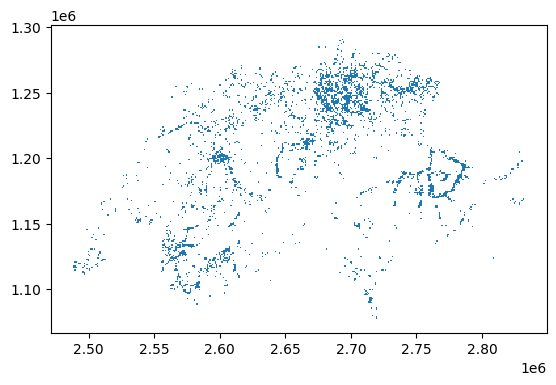

In [161]:
gdf.plot()
plt.show()

In [162]:
# Step 1: Select relevant features for clustering
features = gdf[['elevation', 'WaterRetention', 'NutrientContent', 'WaterPermeability']]

# Step 2: Handle missing values using an imputer
imputer = SimpleImputer(strategy='median')
features_imputed = imputer.fit_transform(features)

# Step 3: Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_imputed)

# Step 4: Apply DBSCAN
dbscan = DBSCAN(eps=0.05, min_samples=5)
gdf['cluster'] = dbscan.fit_predict(scaled_features)

# Step 5: Analyze the results
# Count points in each cluster
cluster_counts = gdf['cluster'].value_counts()
print(cluster_counts)

cluster
 0     22930
 1      1884
 5       297
 7       238
 6        92
 2        69
 3        62
 4        27
 10       25
 8        25
 9        17
-1         9
Name: count, dtype: int64


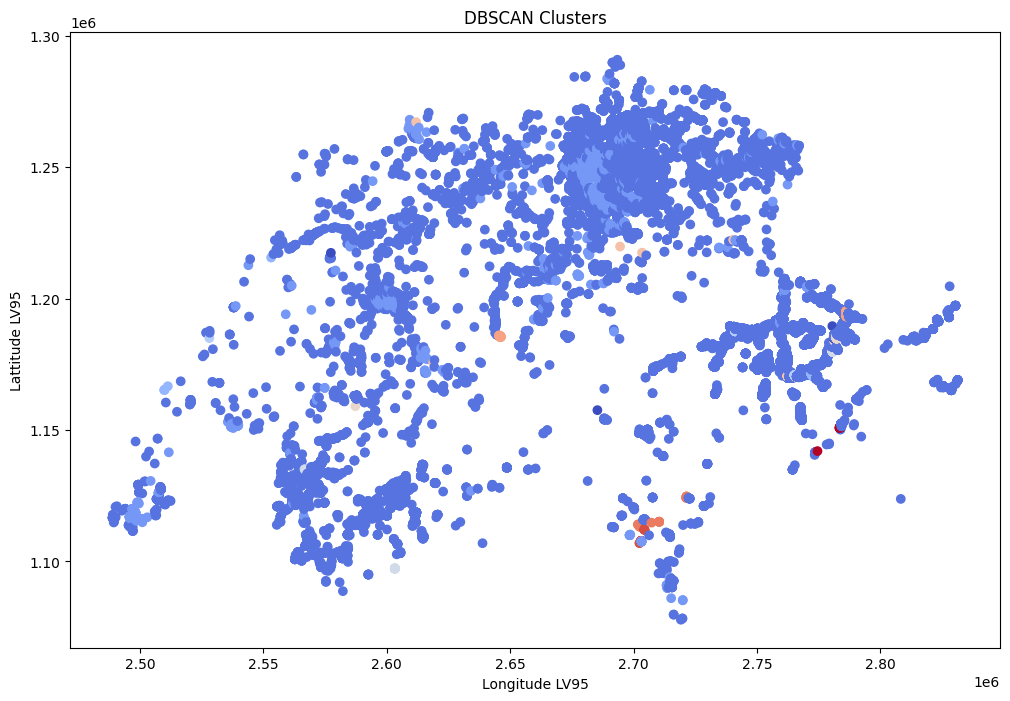

In [163]:
plt.figure(figsize=(12, 8))
plt.scatter(gdf['east_lv95'], gdf['north_lv95'], c=gdf['cluster'], cmap='coolwarm')
plt.title("DBSCAN Clusters")
plt.xlabel("Longitude LV95")
plt.ylabel("Lattitude LV95")
plt.show()


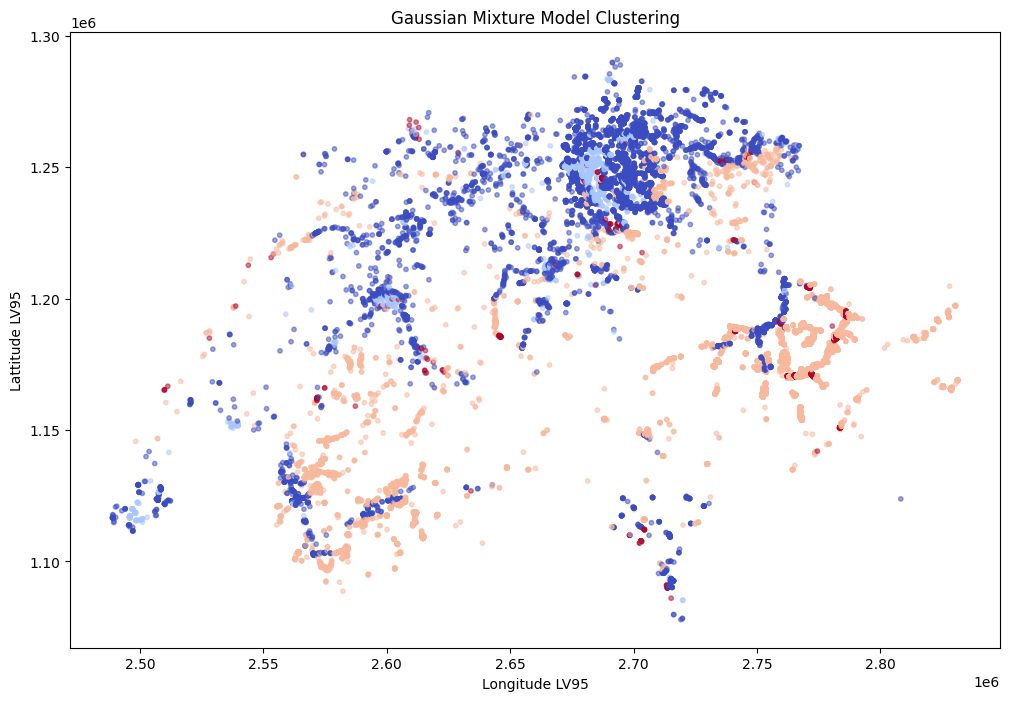

In [164]:

# Step 1: Select relevant features for clustering (assuming you have already imputed and scaled)
features = gdf[['elevation', 'WaterRetention', 'NutrientContent', 'WaterPermeability']]

# Step 2: Fit a Gaussian Mixture Model
n_components = 4
gmm = GaussianMixture(n_components=n_components)
gdf['cluster'] = gmm.fit_predict(scaled_features)

# Step 3: Plot the results
plt.figure(figsize=(12, 8))
plt.scatter(gdf['east_lv95'], gdf['north_lv95'], c=gdf['cluster'], cmap='coolwarm', s=10, alpha=0.5)
plt.title("Gaussian Mixture Model Clustering")
plt.xlabel("Longitude LV95")
plt.ylabel("Lattitude LV95")
plt.show()


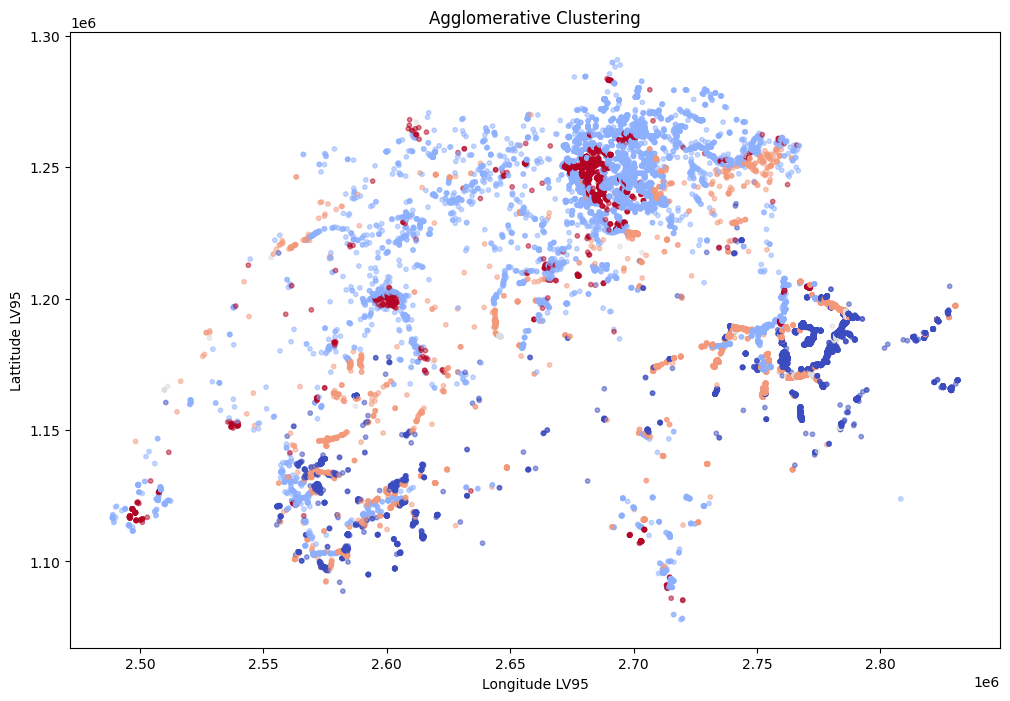

In [165]:
# Step 1: Fit Agglomerative Clustering
n_clusters = 5  # Set the number of clusters
agglo = AgglomerativeClustering(n_clusters=n_clusters)
gdf['cluster'] = agglo.fit_predict(scaled_features)

# Step 2: Plot the results
plt.figure(figsize=(12, 8))
plt.scatter(gdf['east_lv95'], gdf['north_lv95'], c=gdf['cluster'], cmap='coolwarm', s=10, alpha=0.5)
plt.title("Agglomerative Clustering")
plt.xlabel("Longitude LV95")
plt.ylabel("Lattitude LV95")
plt.show()
